In [12]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve

In [13]:
preprocessed_data = pd.read_csv(r'/Users/issackondreddy/Desktop/Projects/Fraud Detection System/DS/data/processed_creditcard.csv')
preprocessed_data.head()

,Scaled_Time,Scaled_Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.996583,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-1.996583,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.996562,0.140534,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
3,-1.996541,-0.073403,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
4,-1.996541,-0.338556,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0


In [14]:
preprocessed_data.shape

(322744, 31)

In [15]:
# Separate features and target
X = preprocessed_data.drop('Class', axis=1)
y = preprocessed_data['Class']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
X_train_cnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)  # Reshape for Conv1D
X_test_cnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

In [18]:
model = models.Sequential()

# Input layer and convolutional layers

model.add(layers.Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(filters=32, kernel_size=2, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))

# Flatten and add dense layers
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/Users/issackondreddy/Desktop/Projects/Fraud Detection System/FDS/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))

Epoch 1/10
7565/7565 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - accuracy: 0.9993 - loss: 0.0027 - val_accuracy: 0.9983 - val_loss: 0.0066
Epoch 2/10
7565/7565 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9994 - loss: 0.0023 - val_accuracy: 0.9996 - val_loss: 0.0025
Epoch 3/10
7565/7565 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.9995 - loss: 0.0020 - val_accuracy: 0.9995 - val_loss: 0.0032
Epoch 4/10
7565/7565 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.9996 - loss: 0.0024 - val_accuracy: 0.9989 - val_loss: 0.0041
Epoch 5/10
7565/7565 ━━━━━━━━━━━━━━━━━━━━ 47s 6ms/step - accuracy: 0.9995 - loss: 0.0020 - val_accuracy: 0.9996 - val_loss: 0.0053
Epoch 6/10
7565/7565 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9995 - loss: 0.0032 - val_accuracy: 0.9985 - val_loss: 0.0074
Epoch 7/10
7565/7565 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - accuracy: 0.9994 - loss: 0.0022 - val_accuracy: 0.9996 - val_loss: 0.0027
Epoch 8/10
7565/7565 ━━━━━━━━━━━━━━━━━━━━ 45s 6ms/step - accuracy: 0.9996 - loss: 0

In [29]:
test_loss, test_acc = model.evaluate(X_test_cnn, y_test)
print(f"Test Accuracy: {test_acc}")

2522/2522 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9996 - loss: 0.0023
Test Accuracy: 0.9995909929275513


In [30]:
y_pred = (model.predict(X_test_cnn) > 0.5).astype("int32")

2522/2522 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52206
           1       1.00      1.00      1.00     28480

    accuracy                           1.00     80686
   macro avg       1.00      1.00      1.00     80686
weighted avg       1.00      1.00      1.00     80686



Text(0.5, 1.0, 'Accuracy over epochs')

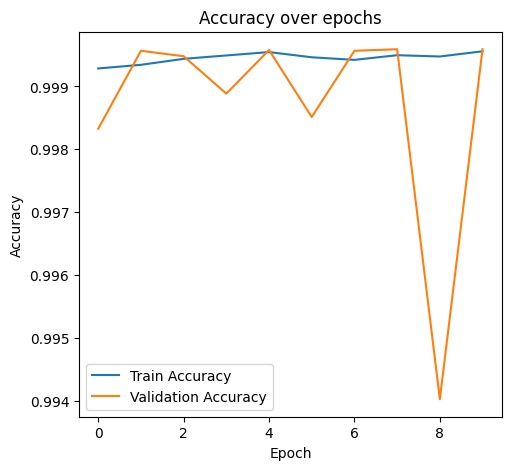

In [32]:
# Plot Accuracy and Loss Curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over epochs')

Text(0.5, 1.0, 'Loss over epochs')

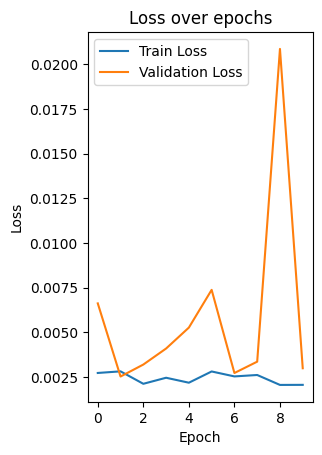

In [33]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over epochs')

2522/2522 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


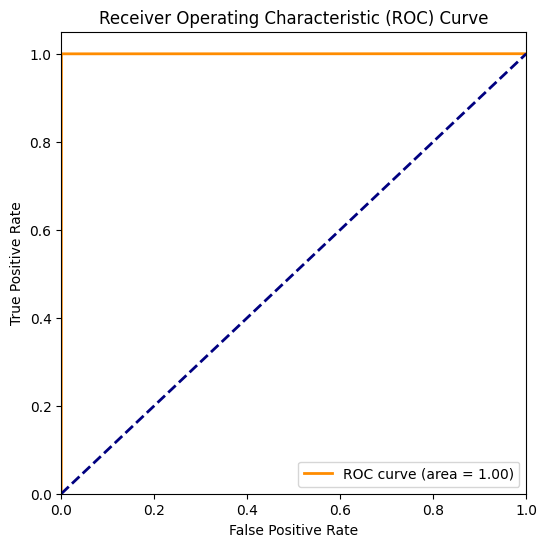

In [34]:

# Compute and plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict(X_test_cnn))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

2522/2522 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


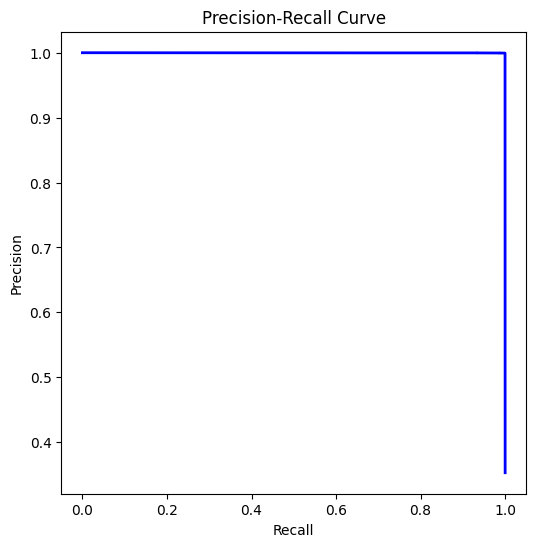

In [35]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, model.predict(X_test_cnn))

plt.figure(figsize=(6, 6))
plt.plot(recall, precision, lw=2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()